<a href="https://colab.research.google.com/github/Therezaclm/Estatistica-com-python/blob/main/Teste_de_Hipotese_Challenge_Womakerscode_Squad_Carmen_Portinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green>**BootCamp TECH MINAs 2023**</font>



# <font color=green>Challenge Teste de Hipóteses</font>

## <font color=blue>Desafio 1: Cosméticos</font>

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O Time de produtos dessa empresa está interessado criar novos batons com maior durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.

De posse dessas informacoes, o time de produtos solicitou aos analistas de dados da
empresa as seguintes perguntas a serem respondidas:

1 - Existe diferenca estatisticamente significativa na durabilidade dos batons com
formulas diferentes?

2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com
relacao a idade?

3- Qual fórmula de batom voce indicaria para consumidores que buscam maior
durabilidade e exposicao ao sol?

*Será analisado inicialmente se as amostras dos batons de formula 1, 2 e 3 são provenientes de uma distribuição normal, tendo como hipótese nula:*

*H0: Amostra proviniente de uma distribuição normal*

In [ ]:
import pandas as pd   ##importando bibliotecas
from scipy.stats import normaltest
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import DescrStatsW
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv("desafio_01_cosmeticos.csv")  ##leitura dos dados
#dados = pd.read_csv("/content/sample_data/desafio_01_cosmeticos_challenge_testehipoteses-230206-120438.csv")
dados.head()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1


In [ ]:
dados.describe().round(2)

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
count,300.00,300.00,300.00,300.00,300.00
mean,2.00,150.50,17.13,36.89,0.44
std,0.82,86.75,10.94,12.63,0.50
min,1.00,1.00,5.00,18.00,0.00
25%,1.00,75.75,9.00,26.00,0.00
50%,2.00,150.50,14.00,36.00,0.00
75%,3.00,225.25,20.00,48.00,1.00
max,3.00,300.00,48.00,60.00,1.00


In [ ]:
significancia = 0.05

In [ ]:
prod_1 = dados.query('id_produto == 1').durabilidade  ##seleção dos dados de durabilidade do produto 1
prod_1.head()

0    12
2    19
3    14
4    17
5    14
Name: durabilidade, dtype: int64

In [ ]:
stat_test1, pvalor1 = normaltest(prod_1) ## verificando se os dados seguem uma distribuição normal
print(stat_test1)
print(pvalor1)

96.02641355261086
1.4064660019609044e-21


In [ ]:
pvalor1 <= significancia

True

Considerando $H_0$ que os dados são provinientes de uma distribuição normal, temos que $p\leq 0,05$, rejeitando assim a hipótese nula.

In [ ]:
prod_2 = dados.query('id_produto == 2').durabilidade ##seleção dos dados de durabilidade do produto 2
prod_2.head()

1     5
9     7
13    5
14    9
15    7
Name: durabilidade, dtype: int64

In [ ]:
stat_test2, pvalor2 = normaltest(prod_2) ## verificando se os dados seguem uma distribuição normal
print(stat_test2)
print(pvalor2)

16.384994610596173
0.0002767219614086259


In [ ]:
pvalor2 <= significancia

True

Hipótese nula de distribuição normal rejeitada.

In [ ]:
prod_3 = dados.query('id_produto == 3').durabilidade ##seleção dos dados de durabilidade do produto 3
prod_3.head()

10    31
11    28
12    38
19    26
23    30
Name: durabilidade, dtype: int64

In [ ]:
stat_test3, pvalor3 = normaltest(prod_3) ## verificando se os dados seguem uma distribuição normal
print(stat_test3)
print(pvalor3)

28.77341246593411
5.648496581565088e-07


In [ ]:
pvalor2 <= significancia

True

O teste realizado a amostra do batom de fórmula 3 não é proviniente de uma distribuição normal.


**Considerando que as amostras não seguem uma distribuição normal, será necessário a utilização do teste não paramétrico Kruskal-Wallis  para verificar se temos diferença significativa na média de durabilidade dos produtos.**

H0: A durabilidade do batom é a mesma para todos os grupos de dados

H1: A durabilidade é diferente para todos os grupos de dados

In [ ]:
stats_total, pvalor_total = stats.kruskal(prod_1, prod_2, prod_3)
print(stats_total)
print(pvalor_total)

227.46096368302588
4.050226510971091e-50


In [ ]:
pvalor_total <= significancia

True

### <font color=green> Resposta:

Considerando o resultado do teste Kruskal-Wallis, tendo o p-valor menor do que a significancia de 0.05, rejeita-se a hipótese nula de que a durabilidade é a mesma para o 3 tipos de cosméticos. </font>

2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com relacao a idade?

In [ ]:
produto_sol = dados.query('exposicao_sol == 1')
produto_sol.head()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
3,1,4,14,36,1
4,1,5,17,46,1
5,1,6,14,56,1
6,1,7,12,29,1


In [ ]:
produto_sol.query('id_produto == 1').mean()[['durabilidade']] ##média de durabilidade do produto 1 com exposição ao sol

durabilidade    11.911111
dtype: float64

In [ ]:
produto_sol.query('id_produto == 1').std()[['durabilidade']] ##desvio de durabilidade do produto 1 com exposição ao sol

durabilidade    1.578581
dtype: float64

In [ ]:
produto_sol.query('id_produto == 2').mean()[['durabilidade']] ##média de durabilidade do produto 2 com exposição ao sol

durabilidade    7.5625
dtype: float64

In [ ]:
produto_sol.query('id_produto == 2').std()[['durabilidade']]  ##desvio de durabilidade do produto 2 com exposição ao sol

durabilidade    1.809035
dtype: float64

In [ ]:
produto_sol.query('id_produto == 3').mean()[['durabilidade']] ##média de durabilidade do produto 3 com exposição ao sol

durabilidade    20.102564
dtype: float64

In [ ]:
produto_sol.query('id_produto == 3').std()[['durabilidade']] ##desvio de durabilidade do produto 3 com exposição ao sol

durabilidade    8.466015
dtype: float64

In [ ]:
produto_naosol = dados.query('exposicao_sol == 0')
produto_naosol.head()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
1,2,2,5,36,0
2,1,3,19,47,0
8,1,9,18,27,0
10,3,11,31,21,0
11,3,12,28,26,0


In [ ]:
#intervalo interquartil.
print(produto_sol.query('id_produto == 1').quantile(q=0.75) - produto_sol.query('id_produto == 1').quantile(q=0.25))
print(produto_sol.query('id_produto == 2').quantile(q=0.75) - produto_sol.query('id_produto == 2').quantile(q=0.25))
print(produto_sol.query('id_produto == 3').quantile(q=0.75) - produto_sol.query('id_produto == 3').quantile(q=0.25))

id_produto         0.0
id_voluntária    119.0
durabilidade       2.0
idade             16.0
exposicao_sol      0.0
dtype: float64
id_produto         0.00
id_voluntária    150.75
durabilidade       3.00
idade             22.00
exposicao_sol      0.00
dtype: float64
id_produto         0.0
id_voluntária    140.0
durabilidade       9.0
idade             12.5
exposicao_sol      0.0
dtype: float64


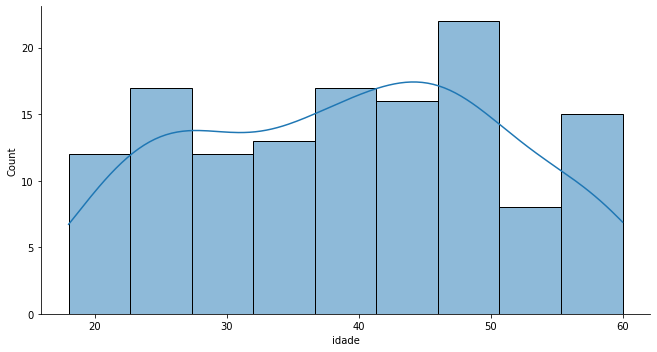

In [ ]:
ax = sns.displot(produto_sol["idade"], kde = True)
ax.figure.set_size_inches(10,5)
ax

<Axes: >

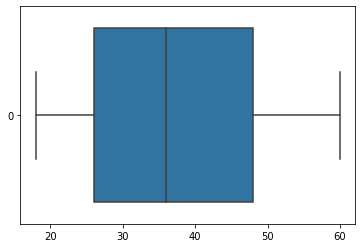

In [ ]:
sns.boxplot(dados["idade"],orient='h')

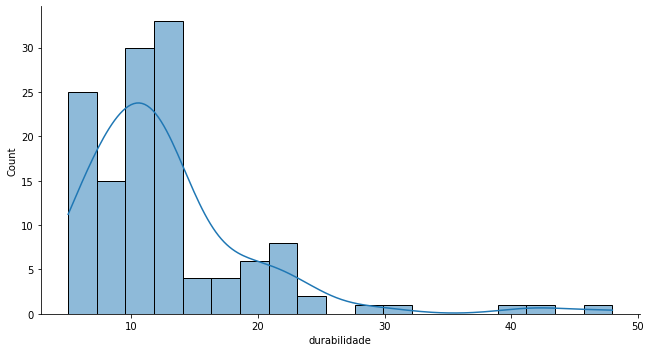

In [ ]:
ax = sns.displot(produto_sol["durabilidade"], kde = True)
ax.figure.set_size_inches(10,5)
ax

<Axes: >

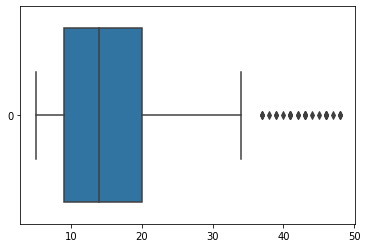

In [ ]:
sns.boxplot(dados["durabilidade"],orient='h')

In [ ]:
produto_sol.corr()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
id_produto,1.000000,0.255433,0.442645,0.269866,NaN
id_voluntária,0.255433,1.000000,0.125548,0.147184,NaN
durabilidade,0.442645,0.125548,1.000000,0.089011,NaN
idade,0.269866,0.147184,0.089011,1.000000,NaN
exposicao_sol,NaN,NaN,NaN,NaN,NaN


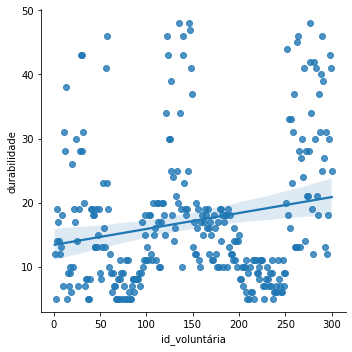

In [ ]:
sns.lmplot(data=dados, x="id_voluntária", y="durabilidade")

In [ ]:
#Testando H0 --> Se não há diferença do produto em relação a  durabilidade na idade das voluntárias quando expostas ao sol
desvio_padrao = produto_sol.durabilidade.std()
media =  produto_sol.durabilidade.mean()
n=1000

amostra = np.random.normal(loc=media,scale=desvio_padrao,size=n)


estatistica_teste,p_valor =ztest(amostra,value=media)
if p_valor <= significancia:
  resultado = f'Rejeita H0: Média menor que {media}'
else:
  resultado =  f'Não rejeita H0'
print(f'media={media}',resultado)



media=12.75 Não rejeita H0


### <font color=green> Resposta:

Considerando o resultado das médias da durabilidade dos produtos quando expostos ao sol,a durabilidade vária conforme a idade das voluntárias </font>

3- Qual fórmula de batom voce indicaria para consumidores que buscam maior durabilidade e exposicao ao sol?

In [ ]:
import statsmodels.stats.weightstats as test_t
#Teste t de Student --> Comparando as médias e apresentando as diferenças significativas

In [ ]:
resultado_teste_t1 = test_t.ttest_ind(produto_sol.query('id_produto == 1'),produto_sol.query('id_produto == 2'),alternative = 'two-sided' )
print('valor p do teste', resultado_teste_t1[1])

valor p do teste [0.00000000e+00 8.91073891e-02 4.32215311e-21 7.22606328e-01
            nan]


/usr/local/lib/python3.9/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: divide by zero encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: invalid value encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff


In [ ]:
resultado_teste_t2 = test_t.ttest_ind(produto_sol.query('id_produto == 1'),produto_sol.query('id_produto == 3'),alternative = 'two-sided' )
print('valor p do teste', resultado_teste_t2[1])

valor p do teste [0.00000000e+00 2.60631165e-03 1.03723342e-08 7.07912204e-04
            nan]


/usr/local/lib/python3.9/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: divide by zero encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: invalid value encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff


In [ ]:
resultado_teste_t3= test_t.ttest_ind(produto_sol.query('id_produto == 2'),produto_sol.query('id_produto == 3'),alternative = 'two-sided' )
print('valor p do teste', resultado_teste_t3[1])

valor p do teste [0.00000000e+00 1.80012499e-01 5.19317998e-16 5.05969095e-03
            nan]


/usr/local/lib/python3.9/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: divide by zero encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: invalid value encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff


In [ ]:
from statsmodels.stats.power import TTestPower

In [ ]:

delta_mean =  produto_sol['durabilidade'].mean() -  produto_sol['exposicao_sol'].mean()
print('delta_mean: % 2f' %delta_mean)
delta_desvio =  produto_sol['durabilidade'].std() - produto_sol['exposicao_sol'].std()
print('delta_desvio: % 2f' %delta_desvio)
effect_size = delta_mean/delta_desvio
print('effect_size: % 2f' %effect_size)

#from statsmodels.stats.power import TTestIndPower
power= TTestPower()
resultado_f = power.solve_power(effect_size=effect_size, alpha=0.05, power=None,
                    nobs=40, alternative='two-sided')
print('power: % 2f' %resultado_f)

delta_mean:  11.750000
delta_desvio:  6.999864
effect_size:  1.678604
power:  1.000000


### <font color=green> Resposta:

Considerando o teste t de Student para comparar as amostras, com base em sua durabildiade diante da exposição do sol, percebe-se que o produto que apresenta maior desempenho é o produto 3  </font>

---

# <font color=green>Challenge Teste de Hipóteses</font>

# <font color=blue>Desafio 2: Empresa de Picolé</font>

Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de determinado produto, um novo picolé, tem uma distribuição  normal com média igual a R$7,85
e desvio padrão igual a R$3,32. Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro.

Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista de dados.

Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52.

1. Voce pode concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia?

2. Qual o valor da variável teste, o intervalo de confianca e o p-valor?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy.stats import norm
from scipy.stats import normaltest
import math

# Hipótese do nosso modelo:

## H0: u = 7,85
## H1: u != 7,85

## 1.Voce pode concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia?

### Definindo a significância do teste ($\alpha$)

In [ ]:
significancia = 0.05

### Testando a variável:

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

### <font color='green'>Resposta: Sim podemos concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia, pois o p valor foi menor que a significancia 0.05.</font>

## 2. Qual o valor da variável teste, o intervalo de confianca e o p-valor?

### <font color='green'>Resposta: O valor da variavel teste é R$ 7.85.</font>

In [ ]:
media_preco = 11.52
media_preco

11.52

In [ ]:
desvio_padrao_preco = 3.32
desvio_padrao_preco

3.32

In [ ]:
media_distr = 7.85
significancia = 0.05
confianca = 1 - significancia
n_picoles = 45

# Hipótese do nosso modelo:

## H0: u = 7,85
## H1: u != 7,85

In [ ]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

### <font color='green'>Resposta: Intervalo de Confiança.</font>

In [ ]:
probabilidade = confianca
probabilidade

0.95

### Obtendo $z_{\alpha/2}$

In [ ]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.6448536269514722

In [ ]:
z = (media_preco - media_distr) / (desvio_padrao_preco / np.sqrt(n_picoles))
z

7.415394106106231

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [ ]:
z <= -z_alpha_2

False

In [ ]:
z >= z_alpha_2

True

### <font color='green'>Resposta: P valor.</font>

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
p_valor = 2 * (1 - norm.cdf(z))
p_valor

1.212363542890671e-13

In [ ]:
p_valor = 2 * (norm.sf(z))
p_valor

1.2126366281061861e-13

In [ ]:
p_valor <= significancia

True

### <font color='green'>Resposta: Como a média amostral $\bar{x}$ é significativamente maior que R$ 7.85, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para unificar os preços dos picolés.</font>

---